In [1]:
from mesmerize import Transmission
from mesmerize.analysis.math.emd import emd_1d
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import euclidean

2021-09-27 01:23:17.700019: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
/home/kushal/repos/MESmerize/mesmerize/common/configuration.py:58: UserWarning: tslearn package not found. tslearn features will be disabled.
  warn(


In [2]:
import matplotlib
matplotlib.__version__
matplotlib.rcParams['image.interpolation'] = 'none'

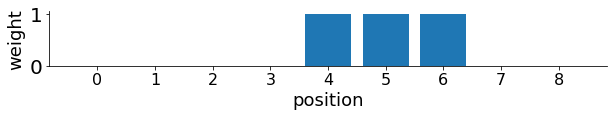

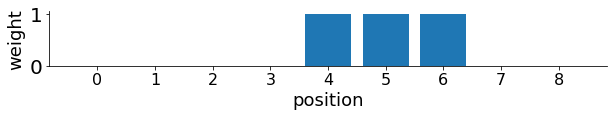

EMD: 0.0
Euc: 0.0


In [3]:
u = np.array([0,0,0,0,1,1,1,0,0])
v = np.array([0,0,0,0,1,1,1,0,0])

fig = plt.figure(figsize=(10, 1))
plt.bar(x=np.arange(u.size), height=u)

plt.xticks(np.arange(u.size))
plt.xticks(fontsize=16)
plt.xlabel('position', fontdict={'fontsize': 18})

plt.yticks([0, 1])
plt.yticks(fontsize=20)
plt.ylabel('weight', fontdict={'fontsize': 18})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()


fig = plt.figure(figsize=(10, 1))
plt.bar(x=np.arange(v.size), height=v)

plt.xticks(np.arange(v.size))
plt.xticks(fontsize=16)
plt.xlabel('position', fontdict={'fontsize': 18})

plt.yticks([0, 1])
plt.yticks(fontsize=20)
plt.ylabel('weight', fontdict={'fontsize': 18})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()


print('EMD: ' + str(emd_1d(u, v)))
print('Euc: ' + str(euclidean(u, v)))

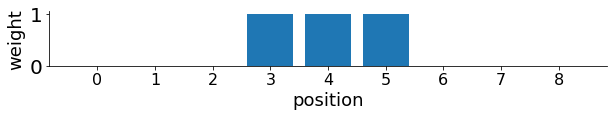

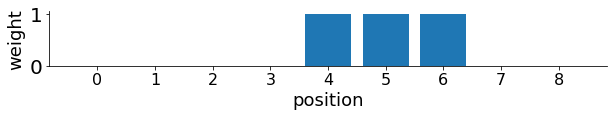

EMD: 1.0
Euc: 1.4142135623730951


In [4]:
u = np.array([0,0,0,1,1,1,0,0,0])
v = np.array([0,0,0,0,1,1,1,0,0])

fig = plt.figure(figsize=(10, 1))
plt.bar(x=np.arange(u.size), height=u)

plt.xticks(np.arange(u.size))
plt.xticks(fontsize=16)
plt.xlabel('position', fontdict={'fontsize': 18})

plt.yticks([0, 1])
plt.yticks(fontsize=20)
plt.ylabel('weight', fontdict={'fontsize': 18})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()


fig = plt.figure(figsize=(10, 1))
plt.bar(x=np.arange(v.size), height=v)

plt.xticks(np.arange(v.size))
plt.xticks(fontsize=16)
plt.xlabel('position', fontdict={'fontsize': 18})

plt.yticks([0, 1])
plt.yticks(fontsize=20)
plt.ylabel('weight', fontdict={'fontsize': 18})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()


print('EMD: ' + str(emd_1d(u, v)))
print('Euc: ' + str(euclidean(u, v)))

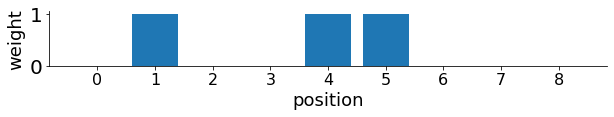

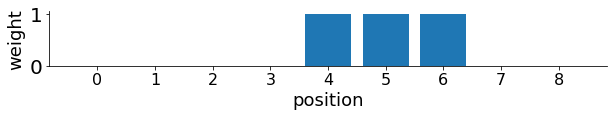

EMD: 1.6666666269302368
Euc: 1.4142135623730951


In [5]:
u = np.array([0,1,0,0,1,1,0,0,0])
v = np.array([0,0,0,0,1,1,1,0,0])

fig = plt.figure(figsize=(10, 1))
plt.bar(x=np.arange(u.size), height=u)

plt.xticks(np.arange(u.size))
plt.xticks(fontsize=16)
plt.xlabel('position', fontdict={'fontsize': 18})

plt.yticks([0, 1])
plt.yticks(fontsize=20)
plt.ylabel('weight', fontdict={'fontsize': 18})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()


fig = plt.figure(figsize=(10, 1))
plt.bar(x=np.arange(v.size), height=v)

plt.xticks(np.arange(v.size))
plt.xticks(fontsize=16)
plt.xlabel('position', fontdict={'fontsize': 18})

plt.yticks([0, 1])
plt.yticks(fontsize=20)
plt.ylabel('weight', fontdict={'fontsize': 18})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

print('EMD: ' + str(emd_1d(u, v)))
print('Euc: ' + str(euclidean(u, v)))

In [6]:
t = Transmission.from_hdf5('/home/kushal/Sars_stuff/hier_all_promoters.ptrn')

In [7]:
import tifffile

def plot_heatmap(a, title: str, savefile=False, **kwargs):
    matplotlib.rcParams['image.interpolation'] = 'none'
    stacked = np.vstack([np.array([a]), np.array([a])])
    
    fig = plt.figure(figsize=(6, 1))
    sns.heatmap(stacked, cmap='jet')
    
    plt.title(f'{title} - Frequency domain', fontdict={'fontsize': 12})
    plt.axis('off')
    plt.tight_layout()
    if savefile:
        plt.savefig(savefile, dpi=600)
    plt.show()
    
    fig = plt.figure(figsize=(5,3))
    plt.plot(a)
    plt.show()

In [8]:
from ipywidgets import interact

In [9]:
u_ix = 20

@interact(u_ix=(0, t.df.index.size, 1), v_ix=(1, t.df.index.size, 1))
def plot_comparison(u_ix=0, v_ix=1):
    fig = plt.figure(figsize=(10, 2))
    plt.plot(t.df._NORMALIZE.iloc[u_ix], c='k')
    plt.axis('off')
    plt.title('u - Time domain', fontdict={'fontsize': 18})
    plt.show()

    plot_heatmap(t.df._SPLICE_ARRAYS.iloc[u_ix], 'u')
    
    fig = plt.figure(figsize=(10, 2))
    plt.plot(t.df._NORMALIZE.iloc[v_ix], c='k')
    plt.axis('off')
    plt.title('u - Time domain', fontdict={'fontsize': 18})
    plt.show()

    plot_heatmap(t.df._SPLICE_ARRAYS.iloc[v_ix], 'v')
    
    u = t.df._SPLICE_ARRAYS.iloc[u_ix].copy()
    v = t.df._SPLICE_ARRAYS.iloc[v_ix].copy()

    u += np.abs(u.min())
    v += np.abs(v.min())

    print('EMD: ' + str(emd_1d(u, v)))
    print('Euc: ' + str(euclidean(u, v)))

interactive(children=(IntSlider(value=0, description='u_ix', max=258), IntSlider(value=1, description='v_ix', …

# Fig 4a-c

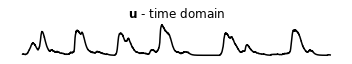

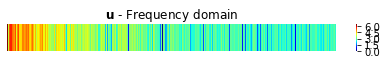

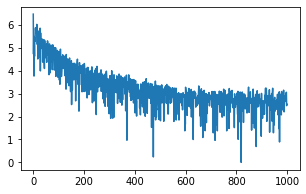

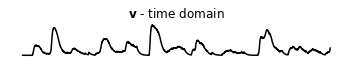

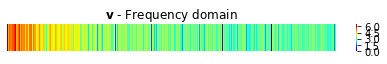

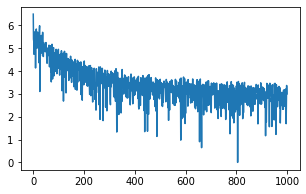

EMD: 1.3000363111495972
Euc: 22.72049656648525
Euc TD:18.658781042264
** Pre-shuffle **
max: 6.463950570798186, min: 0.0, std: 0.8735349913532635, mean: 0.8735349913532635
max: 6.4942919319330334, min: 0.0, std: 0.797404756707528, mean: 0.797404756707528
** Post-shuffle **
max: 6.463950570798186, min: 0.0, std: 0.8735349913532635, mean: 0.8735349913532635
max: 6.4942919319330334, min: 0.0, std: 0.797404756707528, mean: 0.797404756707528


Randomly shuffle u & v
EMD: 5.752904415130615
Euc: 22.72049656648525


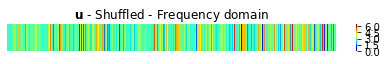

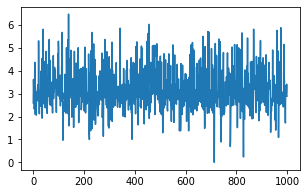

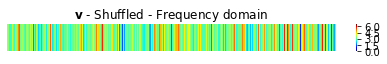

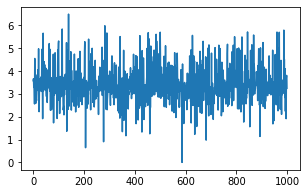

In [10]:
def plot_comparison(u_ix, v_ix):
    root_dir = '/home/kushal/Sars_stuff/Dropbox/fig_data/emd_intro/'
    fname = f'{u_ix}_{v_ix}'
    
    u = t.df._SPLICE_ARRAYS.iloc[u_ix].copy()
    v = t.df._SPLICE_ARRAYS.iloc[v_ix].copy()

    u += np.abs(u.min())
    v += np.abs(v.min())
    
    title = r'$\bf{u}$ - time domain'
    fig = plt.figure(figsize=(5, 1))
    plt.plot(t.df._NORMALIZE.iloc[u_ix], c='k')
    plt.axis('off')
    plt.title(title, fontdict={'fontsize': 12})
    plt.tight_layout()
    plt.savefig(f'{root_dir}/{fname}-u_time_domain.png', dpi=600)
    plt.show()

    plot_heatmap(
        u, 
        r'$\bf{u}$', 
        savefile=f'{root_dir}/{fname}-u_freq_domain.png', 
        vmin=0, vmax=6
    )
    
    title = r'$\bf{v}$ - time domain'
    fig = plt.figure(figsize=(5, 1))
    plt.plot(t.df._NORMALIZE.iloc[v_ix], c='k')
    plt.axis('off')
    plt.title(title, fontdict={'fontsize': 12})
    plt.tight_layout()
    plt.savefig(f'{root_dir}/{fname}-v_time_domain.png', dpi=600)
    plt.show()

    plot_heatmap(
        v, 
        r'$\bf{v}$', 
        savefile=f'{root_dir}/{fname}-v_freq_domain.png',
        vmin=0, vmax=6
    )
    
    u_td = t.df._NORMALIZE.iloc[u_ix]
    v_td = t.df._NORMALIZE.iloc[v_ix]

    print('EMD: ' + str(emd_1d(u, v)))
    print('Euc: ' + str(euclidean(u, v)))
    print('Euc TD:' + str(euclidean(u_td, v_td)))
    
    ixs = np.arange(u.size)
    np.random.shuffle(ixs)
    
    print("** Pre-shuffle **")
    for w in (u, v):
        print(f"max: {max(w)}, min: {min(w)}, std: {w.std()}, mean: {w.std()}")
    
    u = u[ixs]
    v = v[ixs]
    
    print("** Post-shuffle **")
    for w in (u, v):
        print(f"max: {max(w)}, min: {min(w)}, std: {w.std()}, mean: {w.std()}")
    

    print('\n\nRandomly shuffle u & v')
    print('EMD: ' + str(emd_1d(u, v)))
    print('Euc: ' + str(euclidean(u, v)))

    plot_heatmap(u, r'$\bf{u}$ - Shuffled', f'{root_dir}/{fname}-u_shuff.png', vmin=0, vmax=6)
    plot_heatmap(v, r'$\bf{v}$ - Shuffled', f'{root_dir}/{fname}-v_shuff.png', vmin=0, vmax=6)
    
    with open(f'{root_dir}/{fname}.stats', 'w') as f:
        f.write(
            'EMD: ' + str(emd_1d(u, v)) + '\n' +
            'Euc: ' + str(euclidean(u, v)) + '\n' +
            'Euc TD:' + str(euclidean(u_td, v_td)) + '\n' +
            
            '\n\nRandomly shuffle u & v'  + '\n' +
            'EMD: ' + str(emd_1d(u, v))  + '\n' +
            'Euc: ' + str(euclidean(u, v)) + '\n'
        )
    
# plot_comparison(235, 230)
# plot_comparison(207, 196)
plot_comparison(128, 122)